In [1]:
from constants import *
from download import download_monthly_klines as download
import pandas as pd
import glob

if __name__ == '__main__':
    i = 0
    # download(trading_type=TRADING_TYPE[0], symbols=[TICKERS[i] +
    #          BASE],intervals=['1m'], years=[2020, 2021], months=list(range(1, 13)))
    all_files = glob.glob(f'../data/{TICKERS[i] + BASE}/15m/*.csv')
    # print(all_files)
    # pd.read_csv(f'../data/{TICKERS[i] + BASE}/15m')
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, names=["Open time",	"Open",	"High",	"Low",	"Close",	"Volume",	"Close time",
                         "Quote asset volume", "Number of trades",	"Taker buy base asset volume",	"Taker buy quote asset volume",	"Ignore"])
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    # print(frame)


In [2]:
frame['is_green'] = frame['Open'] < frame['Close']
frame.drop(['Open time', 'Close time','Ignore'], axis='columns', inplace=True)

In [3]:
frame

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,is_green
0,7195.24,7196.25,7178.20,7180.97,202.942868,1.458245e+06,2452,76.962041,5.530695e+05,False
1,7180.97,7186.40,7175.47,7178.45,128.242654,9.207027e+05,1948,58.389110,4.192265e+05,False
2,7178.19,7185.44,7176.23,7179.56,83.487458,5.994792e+05,1580,43.822374,3.146673e+05,True
3,7179.35,7183.98,7175.46,7177.02,97.141921,6.974298e+05,1660,46.979601,3.373259e+05,False
4,7176.47,7194.04,7175.71,7190.86,103.520522,7.440891e+05,1588,56.251378,4.043305e+05,True
...,...,...,...,...,...,...,...,...,...,...
61310,57367.82,57386.64,57167.92,57267.91,183.601300,1.051553e+07,7549,91.177860,5.222311e+06,False
61311,57267.90,57424.23,57003.67,57085.48,281.676240,1.611701e+07,9304,143.213180,8.197539e+06,False
61312,57085.48,57360.49,57084.92,57247.46,182.012370,1.041692e+07,8799,97.284000,5.568400e+06,True
61313,57247.46,57276.69,57005.10,57121.35,182.116610,1.039671e+07,8309,91.447110,5.220287e+06,False


In [4]:
frame_dynamic= frame[['Open','Close']]
frame_dynamic.iloc[-100:]

,Open,Close
61215,58048.27,57911.49
61216,57911.50,58005.19
61217,58005.19,57809.99
61218,57809.98,57776.25
61219,57776.25,57885.82
...,...,...
61310,57367.82,57267.91
61311,57267.90,57085.48
61312,57085.48,57247.46
61313,57247.46,57121.35


In [12]:
# [dollar, asset]
actions = [] # 0 - sell
state = []
cash = 100
asset = 0
portfolio ={'cash':cash,'asset':asset}
state.append(portfolio)
def action(state,current,next,fee=0.01):
    if state['cash'] != 0:
        if state['cash'] < (next.Close / current.Close) * state['cash']:
            state['asset'] = (state['cash']/current.Close*(1+fee))
            state['cash'] = 0
    else: 
        if (next.Close / current.Close) * state['asset'] < (1-fee)*state['asset']*current.Close:
            state['cash'] = (1-fee)*state['asset']*current.Close
            state['asset'] = 0
    return state

def optimal(state, frame):
    while len(state)<len(frame)-1:
        state.append(action(state=state[len(state)-1].copy(), current=frame.iloc[len(state)],next=frame.iloc[len(state)+1]))

    
optimal(state,frame_dynamic.iloc[-100:])





In [13]:
df = pd.DataFrame(state)
df

,cash,asset
0,100.000000,0.000000
1,100.000000,0.000000
2,100.000000,0.000000
3,0.000000,0.001748
4,100.179626,0.000000
...,...,...
94,109.658530,0.000000
95,109.658530,0.000000
96,0.000000,0.001940
97,109.958689,0.000000


<AxesSubplot:>

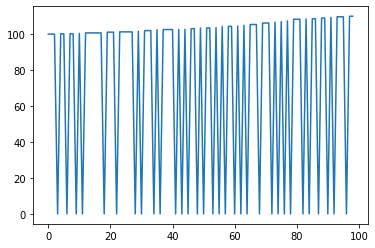

In [14]:
df['cash'].plot()